# Introduction to this python notebook

In [ ]:
"""
What? Plot individual and voting regression predictions

A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. 
Then it averages the individual predictions to form a final prediction.

Reference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py
"""

# Import python modules

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from pylab import rcParams
from matplotlib import pyplot

# Import dataset

In [ ]:
"""
We will work with the diabetes dataset which consists of 10 features collected from a cohort of diabetes patients. 
The target is a quantitative measure of disease progression one year after baseline.
"""

In [2]:
X, y = load_diabetes(return_X_y=True)

# Training classifiers

In [3]:
# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(X, y)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

# Making predictions

In [ ]:
"""
Now we will use each of the regressors to make the 20 first predictions.
"""

In [16]:
xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

# Plot the results

In [ ]:
"""
Finally, we will visualize the 20 predictions. The red stars show the average prediction made by VotingRegressor.
"""

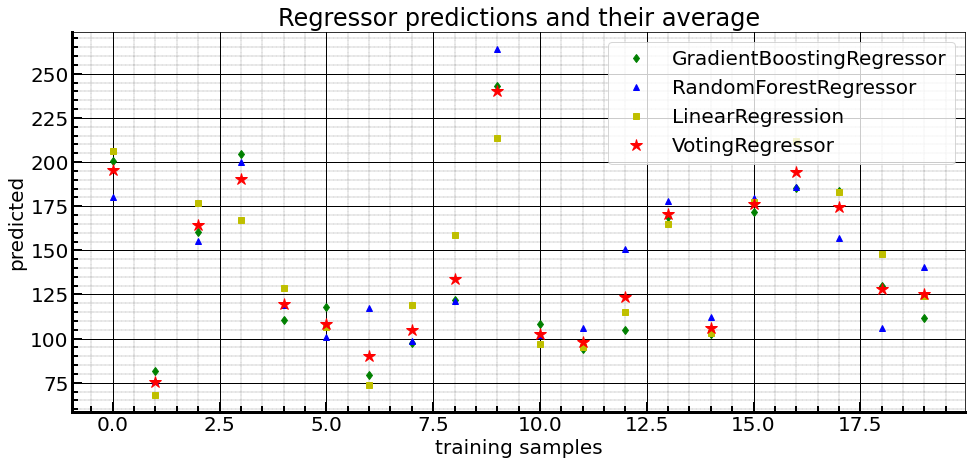

In [17]:
rcParams['figure.figsize'] = 16, 7
rcParams['font.size'] = 20

fig, ax = pyplot.subplots()
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='LinearRegression')
plt.plot(pred4, 'r*', ms = 13, label='VotingRegressor')

#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

ax.grid(which = "major", linestyle='-', linewidth='1.0', color='k')
ax.grid(which = "minor", linestyle='--', linewidth='0.25', color='k')
ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.minorticks_on()
ax.legend()
pyplot.show()
plt.show()